In [425]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sympy as sy
from sympy.stats import Normal, cdf
import scipy.stats as si
from sympy import init_printing
init_printing()

The first part will simply be comparing the explicit method with the exact Black Scholes solutions.

In [426]:
''' Function for computing Call option price via Black Scholes exact method'''
def euro_vanilla_call(S, K, T, r, sig):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sig: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sig ** 2) * T) / (sig * np.sqrt(T))
    d2 = d1 - (sig*math.sqrt(T))
    
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call
   

In [427]:
'''Initial values '''
Smax = 10       ### Max stock price (right boundary Value)
T = 1          ### Time until expiry in years
sigma = 0.1     ### Volatility of uderlying stock
r = 0.05        ### Risk-Free rate
K = 4          ### Strike Price

Function for FDM.

In [429]:
def finiteDifference_Option_Price(Smax, K, T, sigma, r, ds=1, alpha=0.1):      ### ds = Change in price - interval size
    dt = alpha*ds        ### Change in time - interval size
    N = int(Smax/ds)     ### Number of steps on the price axis
    J = int(T/dt)        ### Number of steps on the time axis
    
    ## Create Matrix of Zeros to store values
    V = np.zeros((J+1, N+1))    
  
    ### Boundary for time = 0 (Expiry)
    for n in range(0, N+1):  
        V[0, n] = max((n*ds)-K, 0)

    ### Boundary for Max stock price
    for j in range(1, J+1):
        V[j, N] = Smax - (K*math.exp(-(j*dt)*r)) 

    ### Loops for Finite Difference method
    for j in range(0, J):
        for n in range(1, N):
            a = 1-(dt*r)-((sigma**2)*((n*ds)**2)*dt/(ds**2))-(r*n*dt)
            b = ((sigma**2)*((n*ds)**2)*dt/(2*(ds**2))) + (r*n*dt)
            d = ((sigma**2)*((n*ds)**2)*dt/(2*ds))
            V[j+1, n] = (V[j, n]*a) + (V[j, n+1]*b) + (V[j, n-1]*d)

    return V

        
      
  


Function for exact Black Scholes.

In [430]:
def blackScholes_OptionPrice_Matrix(Smax, K, T, sigma, r, ds=1, alpha=0.1):
    ### ds = Change in price - interval size
    dt = alpha*ds        ### Change in time - interval size
    N = int(Smax/ds)     ### Number of steps on the price axis
    J = int(T/dt)        ### Number of steps on the time axis
    
    ### Create matrix to store exact solutions from black scholes
    B = np.zeros((J+1, N+1))

    ### Boundary for time = 0 (Expiry)
    for n in range(0, N+1): 
        B[0, n] = max((n*ds)-K, 0)

    ### Boundary for Max stock price
    for j in range(1, J+1):
        B[j, N] = Smax - (K*math.exp(-(j*dt)*r)) 

    ### Calculate option price for entire grid using Black Scholes exact method
    for j in range(1, J+1):
        for n in range(1, N+1):
            B[j, n] = euro_vanilla_call(n*ds, K, j*dt, r, sigma)

    return B




FDM using a 10x10 mesh.

In [431]:
V = finiteDifference_Option_Price(Smax, K, T, sigma, r)

In [432]:
B = blackScholes_OptionPrice_Matrix(Smax, K, T, sigma, r)

In [433]:
x_d = np.arange(0, N+1, 1)  ## Need to take shapes from matrix V
y_d = np.arange(0, 1, 1/(J+1))
x,y = np.meshgrid(x_d, y_d)
print(J)
print(N)

10
10


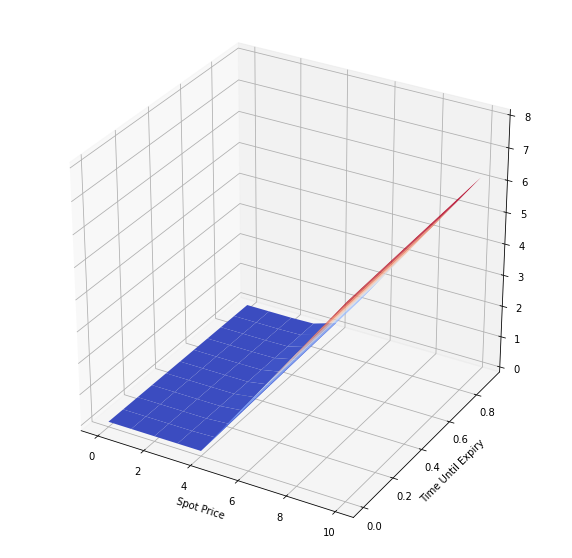

In [352]:
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
plt.xlabel("Spot Price")
plt.ylabel("Time Until Expiry")
ax.set_zlim(0, 8)
ax.plot_surface(x,y,V, cmap=cm.coolwarm)
plt.show()

In [434]:
Error_Mat = ((V-B)**2)**(0.5)
#print(Error_Mat)

In [435]:
print("Maximum Error: ", np.amax(Error_Mat))
print("Average Error: ", np.mean(Error_Mat))

Maximum Error:  0.03748581645716227
Average Error:  0.0032941096520760957


FDM using 100x100 mesh.

In [470]:
V100 = finiteDifference_Option_Price(Smax, K, T, sigma, r, ds=0.1, alpha=1)

In [471]:
B100 = blackScholes_OptionPrice_Matrix(Smax, K, T, sigma, r, ds=0.1, alpha=1)

In [472]:
Error_Mat = ((V100-B100)**2)**(0.5)
#print(Error_Mat)

In [473]:
print(V100)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.80000000e+00
   5.90000000e+00  6.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.88142600e+01
  -1.96606100e+01  6.01995008e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.85078791e+01
   2.06124046e+02  6.03980067e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.56961892e+08
   1.80232354e+08  6.15684224e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.36719398e+09
  -1.90027527e+09  6.17601007e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.23832256e+10
   2.03046537e+10  6.19508230e+00]]


In [474]:
print(B100)

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 5.80000000e+000
  5.90000000e+000 6.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 5.81995008e+000
  5.91995008e+000 6.01995008e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 5.83980067e+000
  5.93980067e+000 6.03980067e+000]
 ...
 [0.00000000e+000 0.00000000e+000 2.09447433e-242 ... 5.95684224e+000
  6.05684224e+000 6.15684224e+000]
 [0.00000000e+000 0.00000000e+000 2.87598240e-215 ... 5.97601007e+000
  6.07601007e+000 6.17601007e+000]
 [0.00000000e+000 5.41162615e-293 1.49678658e-193 ... 5.99508230e+000
  6.09508230e+000 6.19508230e+000]]


In [475]:
print("Maximum Error: ", np.amax(Error_Mat))
print("Average Error: ", np.mean(Error_Mat))

Maximum Error:  95267190491.17964
Average Error:  336206786.0318278


I will now adjust the alpha values and therefore the ratio of S time steps to T time steps to look at differences in stability and try to find the optimal S/T time step ratio.

I first need a function so I can loop through for different alpha values.

In [436]:
from sympy.stats.crv_types import Dagum
def alpha_test(da, size): 
    
    ### Create array for storage of error values for each alpha value
    alphaError_mat_size = size
    alphaError_Vals = np.zeros(alphaError_mat_size)
    
    ### Loop to cycle through alpha values
    for i in range(1, size+1):
        ### Alpha value
        alpha = i*da
        
        ### Array storing option values using FDM
        V = finiteDifference_Option_Price(Smax, K, T, sigma, r, alpha=alpha)

        ### Array of Black Scholes exact values
        B = blackScholes_OptionPrice_Matrix(Smax, K, T, sigma, r, alpha=alpha)

        ### Error matrix
        Error_Mat = ((V-B)**2)**(0.5)

        #print(np.mean(Error_Mat))
        #print(i)

        ### Storing average error values in array
        alphaError_Vals[i-1] = np.mean(Error_Mat)

    return alphaError_Vals



In [437]:
Error_Values = alpha_test(0.01, 100)

In [438]:
print(Error_Values)

[0.00359138 0.00356028 0.00352408 0.00349559 0.00346251 0.00341049
 0.00338594 0.00334191 0.00332288 0.00329411 0.00325484 0.0032041
 0.0031405  0.00314714 0.00306437 0.00306711 0.00296127 0.00296018
 0.00295904 0.00295812 0.00281427 0.00280927 0.00280421 0.00279923
 0.00279448 0.00259487 0.00258623 0.00257738 0.00256843 0.00255945
 0.00255051 0.00254168 0.002533   0.00223485 0.00222307 0.00221101
 0.00219873 0.00218627 0.00217366 0.00216093 0.00214811 0.00213524
 0.00212233 0.00210942 0.00209651 0.00208364 0.00207082 0.00205806
 0.00204539 0.00203282 0.00152662 0.00151312 0.00149941 0.0014855
 0.00147139 0.00145711 0.00144266 0.00142805 0.0014133  0.00139842
 0.00138341 0.0013683  0.00135308 0.00133777 0.00132237 0.0013069
 0.00129137 0.00127578 0.00126014 0.00124446 0.00122874 0.00121301
 0.00119725 0.00118149 0.00116572 0.00114996 0.00113421 0.00111848
 0.00110277 0.00108709 0.00107145 0.00105585 0.00104031 0.00102482
 0.00100939 0.00099402 0.00097873 0.00096352 0.00094839 0.0009333

In [439]:
### The minimum error 
min_error = np.min(Error_Values)
print("Minimum error value: ", min_error)

Minimum error value:  0.0009333462757784868


In [440]:
### Index of minimum error so we can establish the corresponding alpha
alpha_index = np.where(Error_Values == min_error)
print("Index for optimal alpha value: ", alpha_index[0][0])


Index for optimal alpha value:  89


In [452]:
### Optimal Alpha Value
Optimal_alpha = (alpha_index[0][0]-1)*0.01
print("Optimal Alpha: ", Optimal_alpha)

Optimal Alpha:  0.88


Now we want to try another FDM with a smaller difference using the alpha we have found.

In [458]:
V1 = finiteDifference_Option_Price(Smax, K, T, sigma, r, ds=1, alpha=Optimal_alpha)

In [459]:
print(np.shape(V1))
print(V1)

(2, 11)
[[0.         0.         0.         0.         0.         1.
  2.         3.         4.         5.         6.        ]
 [0.         0.         0.         0.         0.2464     1.176
  2.176      3.176      4.176      5.176      6.17218417]]


In [461]:
B1 = blackScholes_OptionPrice_Matrix(Smax, K, T, sigma, r, ds=1, alpha=Optimal_alpha)

In [462]:
Error_Mat = ((V1-B1)**2)**(0.5)

In [463]:
print("Maximum Error: ", np.amax(Error_Mat))
print("Average Error: ", np.mean(Error_Mat))

Maximum Error:  0.0038158298921864287
Average Error:  0.0009635186288146312
